<a href="https://colab.research.google.com/github/Itsvi-ctor/Trained_CNN_model_/blob/main/Link_to_image_classification%202_with_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

def load_audio(file_path, sample_rate=44100):
    audio, sr = librosa.load(file_path, sr=sample_rate, mono=False)
    return audio, sr

def calculate_spectrogram(audio, sample_rate):
    mono_audio = librosa.to_mono(audio)
    stft = librosa.stft(mono_audio)
    spectrogram = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    return spectrogram

def visualize_spectrogram(audio, sample_rate):
    spectrogram = calculate_spectrogram(audio, sample_rate)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 1, 1)
    librosa.display.specshow(spectrogram, sr=sample_rate, x_axis="time", y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()
    return spectrogram  # Return the spectrogram data


if __name__ == "__main__":
    file_path = '/content/drive/My Drive/test_audio/3.wav'  # Replace with the path to your audio file
    audio, sample_rate = load_audio(file_path)
    print(f"Processing audio file: {file_path}")
    # visualize_spectrogram(audio, sample_rate)


Processing audio file: /content/drive/My Drive/test_audio/3.wav


In [30]:
# import os

# # Specify the path to your file
# # file_path = '/content/drive/My Drive/Colab Notebooks/model.keras'
# file_path = visualize_spectrogram(audio, sample_rate)

# # Check if the file exists
# file_exists = os.path.isfile(file_path)

# print(file_exists)  # This will print True if the file exists, False otherwise


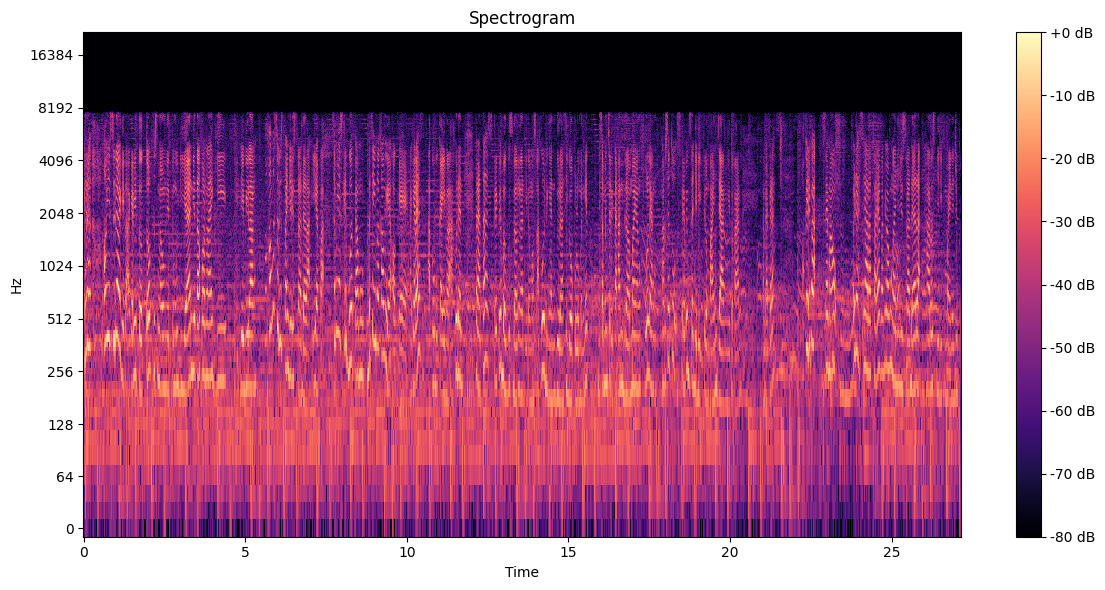

In [31]:
spectrogram = visualize_spectrogram(audio, sample_rate)

In [32]:
# image = cv2.imread(image_path)
# print(f"Image data: {image}")  # This should print a numpy array
# #

In [37]:
print(spectrogram.shape)

(1025, 2338)


1/1 [==============================] - 0s 202ms/step
Healthy Chicken


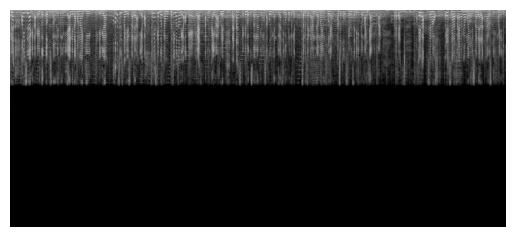

In [40]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained model
model_path = '/content/drive/My Drive/Colab Notebooks/model.keras'  # Update this to the path of your .keras file
model = load_model(model_path)

def preprocess_image(spectrogram):
    # Convert the grayscale spectrogram to RGBA by repeating the grayscale values across all four channels
    spectrogram_rgba = cv2.cvtColor(spectrogram, cv2.COLOR_GRAY2RGBA)

    # Resize the spectrogram
    spectrogram_resized = cv2.resize(spectrogram_rgba, (1200, 600))

    # Normalize pixel values
    spectrogram_resized = spectrogram_resized.astype('float32') / 255
    return spectrogram_resized


def predict_image(spectrogram):
    preprocessed_image = preprocess_image(spectrogram)
    # Expand dimensions to include batch size
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
    prediction = model.predict(preprocessed_image)
    return prediction

# Assuming 'spectrogram' is a valid image array you've loaded elsewhere
prediction = predict_image(spectrogram)

# Interpret the prediction
if prediction[0][0] > 0.5:
    print("Healthy Chicken")
else:
    print("Unhealthy Chicken")

# Display the spectrogram image
# Assuming 'image' is a valid image array you've loaded elsewhere
plt.imshow(spectrogram, cmap='gray')
plt.axis('off')
plt.show()
